In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# sns.set_context("paper")
# sns.set(font_scale=1.5)

In [3]:
df = pd.read_csv("./fuzz-tests.csv")

def sanitize_wallclocktime(s):
#     print(s)
    if isinstance(s, float):
        return None
    i = s.find(".")
    s = s[:i]
    if s.count(":") < 2:
        s = f"00:{s}"
    return s.strip()

WALLCLOCK = 'wall clock time (h:)m:ss'
df[WALLCLOCK] = df[WALLCLOCK].map(sanitize_wallclocktime)
df[WALLCLOCK] = pd.to_timedelta(df[WALLCLOCK])
df['mode'] = df['mode'].map(lambda x: x.replace("mode-", ""))
df['runtime'] = df[WALLCLOCK].map(lambda x: x.total_seconds())
df.rename(columns={"contract": "contractname"}, inplace=True)
df = df.assign(tool='efcf')

In [4]:
df.loc[df[WALLCLOCK].isnull()]

,contractname,mode,status,crashes - Number of unique TX sequences,time,cumulative_execs_per_sec,wall clock time (h:)m:ss,total_execs_done,evm-coverage,bugtypes,...,hardcoded address,total_time,bugs,total_crashes,queue - Number of unique TX sequences,crashes -,average_execs_per_sec,log,runtime,tool


In [5]:
df.describe()

,crashes - Number of unique TX sequences,time,cumulative_execs_per_sec,wall clock time (h:)m:ss,total_execs_done,evm-coverage,bugtypes,total_hangs,hardcoded address,total_time,total_crashes,queue - Number of unique TX sequences,crashes -,average_execs_per_sec,runtime
count,2496.000000,2790.000000,2790.000000,2790,2.790000e+03,2790.000000,2790.0,2790.0,2790.0,2790.000000,2790.000000,2790.000000,294.0,2790.000000,2790.000000
mean,1.010417,973.390681,14099.881004,0 days 00:16:20.129749103,1.016031e+07,65.984273,1.0,0.0,1.0,973.390681,1.692832,74.196416,0.0,14099.881004,980.129749
std,0.101549,2239.251698,7130.581974,0 days 00:37:19.334456606,2.426855e+07,14.165372,0.0,0.0,0.0,2239.251698,1.580601,77.955289,0.0,7130.581974,2239.334457
min,1.000000,0.000000,0.000000,0 days 00:00:04,2.500000e+01,28.000000,1.0,0.0,1.0,0.000000,0.000000,2.000000,0.0,0.000000,4.000000
25%,1.000000,5.000000,11107.750000,0 days 00:00:11,9.451975e+04,54.787736,1.0,0.0,1.0,5.000000,1.000000,18.000000,0.0,11107.750000,11.000000
50%,1.000000,37.000000,14469.000000,0 days 00:00:43,5.555890e+05,66.666667,1.0,0.0,1.0,37.000000,1.000000,57.000000,0.0,14469.000000,43.000000
75%,1.000000,276.750000,17562.000000,0 days 00:04:44.750000,3.554136e+06,76.713984,1.0,0.0,1.0,276.750000,2.000000,99.000000,0.0,17562.000000,284.750000
max,2.000000,7200.000000,54125.000000,0 days 02:05:05,1.366373e+08,93.617021,1.0,0.0,1.0,7200.000000,13.000000,657.000000,0.0,54125.000000,7505.000000


In [6]:
len(set(df['contractname']))

93

In [7]:
df

,contractname,mode,status,crashes - Number of unique TX sequences,time,cumulative_execs_per_sec,wall clock time (h:)m:ss,total_execs_done,evm-coverage,bugtypes,...,hardcoded address,total_time,bugs,total_crashes,queue - Number of unique TX sequences,crashes -,average_execs_per_sec,log,runtime,tool
0,BuggyToken,2AT,success,1.0,46,30275,0 days 00:00:53,1392675,84.693878,1,...,1,46,[BUG] balance gain | 2531810757 wei (compare t...,1,214,NaN,30275,<NO LOG>,53.0,efcf
1,BuggyToken,2AT,success,1.0,86,22160,0 days 00:01:34,1905785,83.673469,1,...,1,86,[BUG] balance gain | 18446744073709551614 wei ...,3,189,NaN,22160,<NO LOG>,94.0,efcf
2,BuggyToken,2AT,success,1.0,8,34371,0 days 00:00:14,274969,68.367347,1,...,1,8,[BUG] balance gain | 2565496770 wei (compare t...,1,158,NaN,34371,<NO LOG>,14.0,efcf
3,BuggyToken,2AT,success,1.0,7,47528,0 days 00:00:12,332702,68.367347,1,...,1,7,[BUG] balance gain | 18446744073709551613 wei ...,1,154,NaN,47528,<NO LOG>,12.0,efcf
4,BuggyToken,2AT,success,1.0,7,45136,0 days 00:00:13,315956,67.346939,1,...,1,7,[BUG] balance gain | 6 wei (compare total 3766...,1,126,NaN,45136,<NO LOG>,13.0,efcf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,tokensalechallenge,monly,success,2.0,17,16682,0 days 00:00:24,283595,47.058824,1,...,1,17,[BUG] balance gain | 1000000000000000000 wei (...,2,71,NaN,16682,<NO LOG>,24.0,efcf
2786,tokensalechallenge,monly,success,1.0,14,19413,0 days 00:00:20,271793,47.058824,1,...,1,14,[BUG] balance gain | 1000000000000000000 wei (...,2,53,NaN,19413,<NO LOG>,20.0,efcf
2787,tokensalechallenge,monly,success,1.0,23,14719,0 days 00:00:30,338540,47.058824,1,...,1,23,[BUG] balance gain | 12000000000000000000 wei ...,1,81,NaN,14719,<NO LOG>,30.0,efcf
2788,tokensalechallenge,monly,success,1.0,17,15246,0 days 00:00:24,259196,47.058824,1,...,1,17,[BUG] balance gain | 8000000000000000000 wei (...,2,63,NaN,15246,<NO LOG>,24.0,efcf


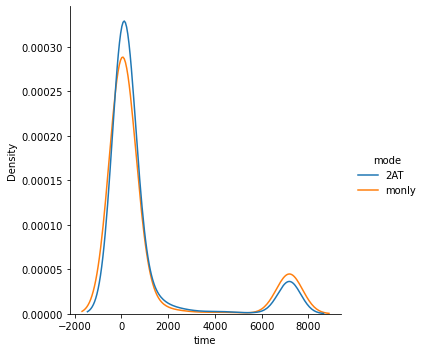

In [8]:
sns.displot(data=df, x='time', hue='mode', kind='kde')

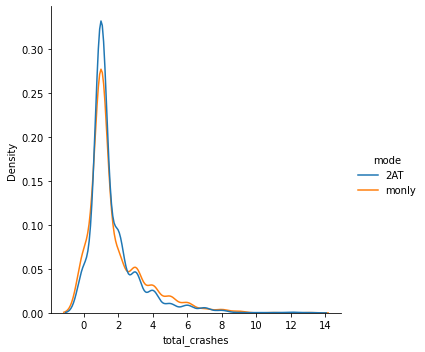

In [9]:
sns.displot(data=df, x='total_crashes', hue='mode', kind='kde')

In [43]:
cols = ["contractname", "count", "success", "fail", "time_mean", "time_min", "time_max"]
def make_frame(contract):
    d =  df[df['contractname'] == contract]
    data = [contract, len(d), len(d[d['total_crashes'] > 0]), len(d[d['total_crashes'] == 0]), d['time'].mean(), d['time'].min(), d['time'].max()]
    return pd.DataFrame([data], columns=cols)

summary = pd.concat([
    make_frame(contract) for contract in set(df['contractname'])    
], ignore_index=True)    


In [51]:
summary[summary['fail'] == summary['count']]

,contractname,count,success,fail,time_mean,time_min,time_max
7,ReturnDataCheck5,30,0,30,7200.0,7200,7200
15,ReentrancyBuggyLock3,30,0,30,7200.0,7200,7200
26,SuicidalDoSOnly,30,0,30,7200.0,7200,7200
64,number_constraints,30,0,30,7200.0,7200,7200
79,ReturnDataCheck6,30,0,30,7200.0,7200,7200
84,initbalance2,30,0,30,7200.0,7200,7200


In [55]:
summary[(summary['fail'] < summary['count']) & (summary['fail'] > 0)]

,contractname,count,success,fail,time_mean,time_min,time_max
1,ReturnDataCheck3,30,15,15,3867.766667,139,7200
10,arbitrary_location_write_simple,30,28,2,1645.366667,52,7200
14,ReturnDataCheck4,30,29,1,1320.566667,61,7200
25,ReentrancyVulnBankBuggyLockHard,30,21,9,3217.866667,50,7200
32,ReturnDataCheckMultiple,30,29,1,1119.966667,289,7200
54,ReentrancyDeepCrossFunctionMultiAttackerLevels,30,27,3,1863.100000,157,7200
55,calldata3,30,14,16,5854.500000,1927,7200
56,number_equals_storage_hashed,30,13,17,4374.833333,102,7200
59,ReturnDataCheck7,30,15,15,3808.700000,92,7200
60,SpankchainLedgerChannel,30,4,26,6477.566667,322,7200
